In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")

import sys
print(sys.version)

%matplotlib inline

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


In [2]:
df = pd.read_csv('MIE_resources/my_dataset2_conRilevamento.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.columns = ['id', 'Time', 'mac', 'power', 'sequence', 'SSID', 'suppRates', 'ExtSuppRates','HTCapabilitiesInfo', 'A-MPDU', 'HTExtendendCapabilities', 'orderedTagList', 'formattingCapabilities', 'channel', 'UUID-E', 'primaryDevice', 'model', 'modelNumber', 'deviceName', 'vendorExtention', 'vendorId', 'OUI']
df.head(4)

,id,Time,mac,power,sequence,SSID,suppRates,ExtSuppRates,HTCapabilitiesInfo,A-MPDU,HTExtendendCapabilities,orderedTagList,formattingCapabilities,channel,UUID-E,primaryDevice,model,modelNumber,deviceName,vendorExtention,vendorId,OUI
0,1226,2017-07-12 13:04:03.774362394,c0:ee:fb:5e:49:36,-59,3378,NaN,"1,2,5.5,11","6,9,12,18,24,36,48,54",0x012c,0x03,0x0000,"SSID parameter set,Supported Rates,Extended Su...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-50-f2
1,1244,2017-07-12 13:04:03.806212690,c0:ee:fb:5e:49:36,-59,3381,NaN,"1,2,5.5,11","6,9,12,18,24,36,48,54",0x012c,0x03,0x0000,"SSID parameter set,Supported Rates,Extended Su...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-50-f2
2,4312,2017-07-12 13:04:14.312040813,78:9f:70:01:77:fe,-59,705,eduroam,"1,2,5.5,11","6,9,12,18,24,36,48,54",0x0021,0x17,0x0000,"SSID parameter set,Supported Rates,Extended Su...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"00-50-f2,00-10-18"
3,5612,2017-07-12 13:04:23.833348213,c0:ee:fb:5e:49:36,-49,3421,NaN,"1,2,5.5,11","6,9,12,18,24,36,48,54",0x012c,0x03,0x0000,"SSID parameter set,Supported Rates,Extended Su...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-50-f2


In [4]:
df.isnull().sum()

id                           0
Time                         0
mac                          0
power                        0
sequence                     0
SSID                       209
suppRates                    0
ExtSuppRates                 1
HTCapabilitiesInfo          40
A-MPDU                      40
HTExtendendCapabilities     40
orderedTagList               0
formattingCapabilities     292
channel                      0
UUID-E                     379
primaryDevice              379
model                      379
modelNumber                379
deviceName                 379
vendorExtention            379
vendorId                   379
OUI                         22
dtype: int64

In [5]:
df.describe()

,id,power,sequence,channel,vendorId
count,4.090000e+02,409.000000,409.000000,409.0,30.0
mean,1.338519e+06,-51.965770,2063.075795,1.0,14122.0
std,1.103132e+06,5.510133,1332.754569,0.0,0.0
min,1.226000e+03,-59.000000,1.000000,1.0,14122.0
25%,3.598440e+05,-56.000000,752.000000,1.0,14122.0
50%,9.908950e+05,-53.000000,2266.000000,1.0,14122.0
75%,2.476600e+06,-48.000000,3425.000000,1.0,14122.0
max,3.403676e+06,-37.000000,4078.000000,1.0,14122.0


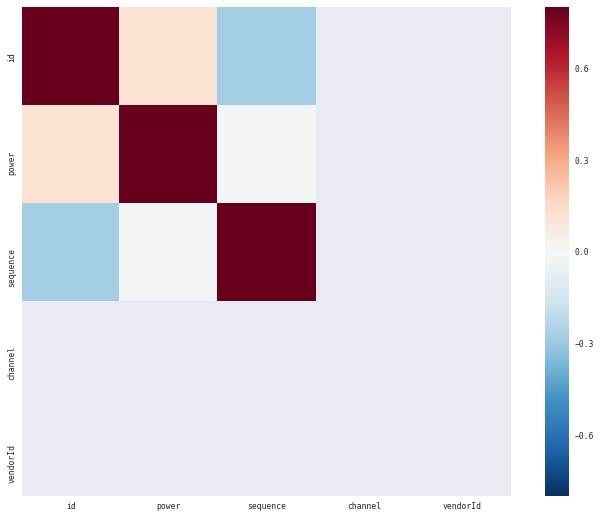

In [6]:
# Correlazione tra i vari attributi

#
# Problema: non lo fa di tutti i valori, se un valore è stringa allora non lo fa, bisognerebbe convertirlo
#

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)


In [7]:
mac_diff = df.groupby('mac').id.nunique()
mac_diff.describe()
#
# 51 mac diversi, nel nostro conteggio sono presenti 46 persone
# ogni mac invia mediamente 8 probe, con un minimo di 1 ed un massimo di 66
# in realtà però il 25%quantile è 2 perciò il 25% delle persone hanno inviato solo 1-2 probe

count    51.000000
mean      8.019608
std      12.600778
min       1.000000
25%       2.000000
50%       3.000000
75%       8.000000
max      66.000000
Name: id, dtype: float64

In [8]:
mac_diff

mac
00:22:d0:ca:a6:31     4
10:f9:6f:9a:62:a7    15
14:2d:27:d9:1b:fb     4
14:30:c6:5a:6a:93     8
18:65:90:8d:bf:62     1
1c:cd:e5:66:c8:d9     2
2c:0e:3d:d8:aa:98    66
2c:f0:a2:82:eb:62     1
40:0e:85:35:d1:db    13
40:f3:08:3a:f3:c1    23
44:c3:46:d3:d6:87     3
4a:1b:02:11:0b:a6     2
4c:cb:f5:f4:cc:78    17
50:55:27:ba:bc:f4     2
68:64:4b:83:f7:73    29
6c:72:e7:d7:f0:78     1
6c:8d:c1:26:3e:80     3
70:28:8b:5c:b6:88     7
74:81:14:1f:aa:42     4
76:cf:00:f3:8b:50     2
78:00:9e:5f:8d:92    19
78:9f:70:01:77:fe     3
7c:f9:0e:6c:bc:c3     6
80:65:6d:c0:2a:45     8
80:6a:b0:e5:9b:64     4
84:38:38:36:00:ce     1
84:38:38:91:81:9c     2
8c:1a:bf:56:6a:5c     8
96:59:4a:02:da:95     1
96:c9:2d:6c:db:b4     1
98:f0:ab:4e:a4:2c     9
9c:fc:01:b7:e2:3b     1
a0:39:f7:79:24:62     2
a0:f8:95:63:d9:ae     4
a8:5b:78:3e:80:98     5
ac:5f:3e:b9:cf:2e     1
b8:5a:73:ba:fc:36     6
be:22:0b:90:40:b6     1
c0:bd:d1:ac:1d:67     2
c0:c9:76:eb:5a:5c    11
c0:ee:fb:33:aa:f9     2
c0:ee:fb:5e:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002474CABFA58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002474CE494E0>]], dtype=object)

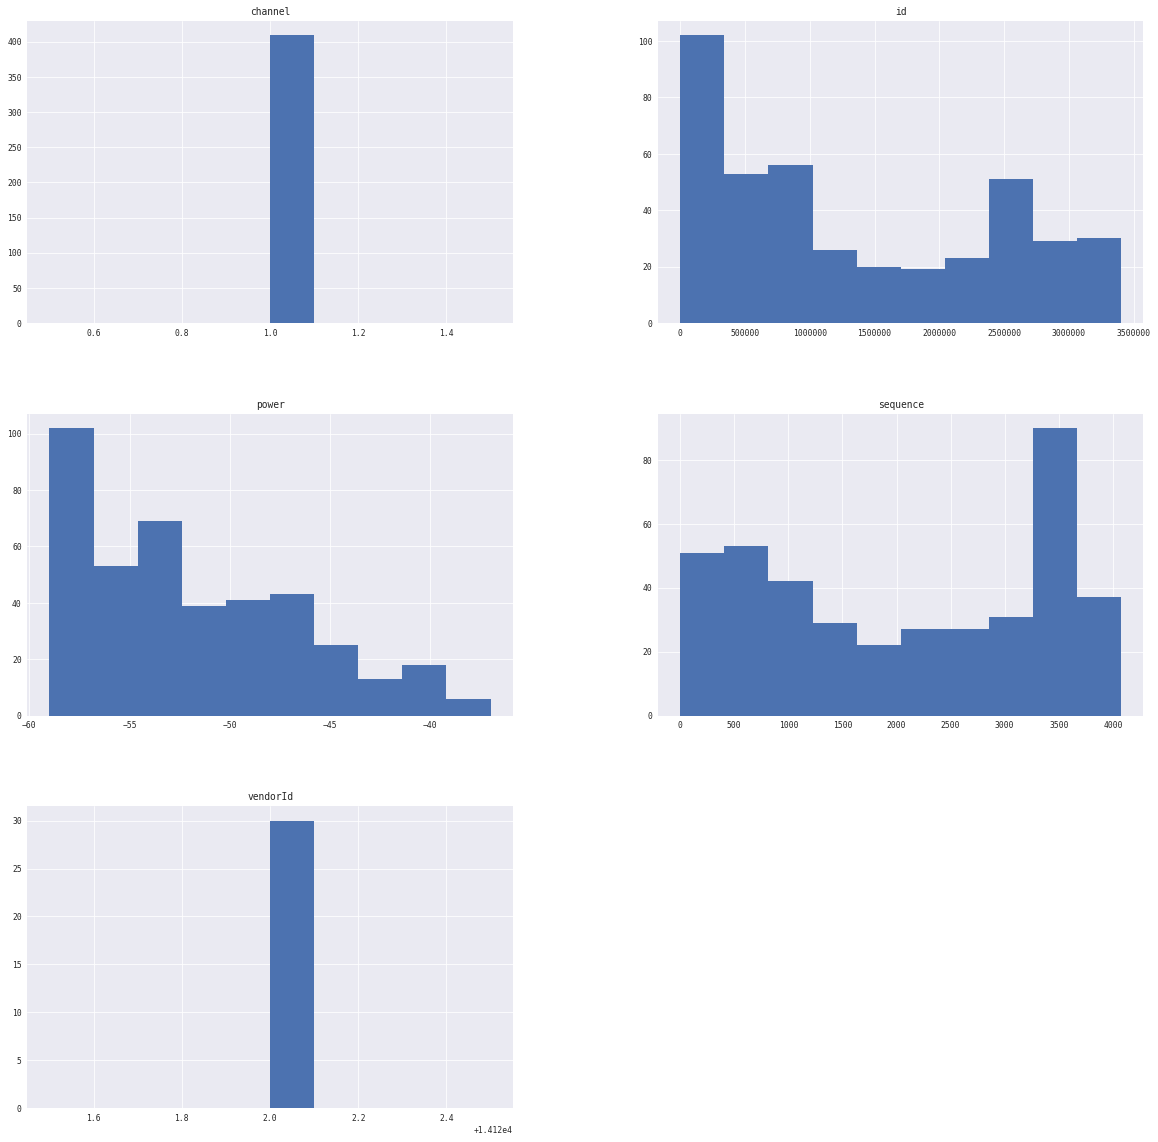

In [9]:
df.hist(figsize=(20, 20))

In [11]:
# Lista dei Mac noti
# I mac non randomizzati si possono distinguere da quelli reali considerando se è un mac associato ad un'azienda
# I mac non possono essere randomizzati usando mac appartenenti a range posseduti da aziende, in quanto potrebbero
# esistere device con quel mac     DIREI
#
# Inoltre riusciamo ad aggiungere ai pacchetti un informazione che può essere non banale: il vendor

mac_vendor = pd.read_csv('MIE_resources/mac_address_vendor.csv')

In [12]:
for i in range(0, len(mac_vendor)):
    mac_vendor.loc[i, 'prefix'] = mac_vendor.prefix[i][0:2].lower()+":"+mac_vendor.prefix[i][2:4].lower()+":"+mac_vendor.prefix[i][4:6].lower()
mac_vendor.head()

,Unnamed: 0,companyName,country,prefix,streetAddress1,streetAddress2
0,0,"Shenzhen ViewAt Technology Co.,Ltd.",CN,e0:43:db,NaN,NaN
1,1,Integrated Device Technology (Malaysia) Sdn. Bhd.,MY,24:05:f5,NaN,NaN
2,2,NETGEAR,US,2c:30:33,NaN,NaN
3,3,Hewlett Packard,US,3c:d9:2b,NaN,NaN
4,4,Hewlett Packard,US,9c:8e:99,NaN,NaN


In [55]:
#df.insert(3, 'vendor', ['']*len(df))
for i in range(0, len(df)):
    vendor = mac_vendor.loc[mac_vendor['prefix'] == df.loc[i, 'mac'][0:8]].companyName.tolist()
    if(len(vendor)>0):
        df.loc[i, 'vendor'] = vendor[0]

In [56]:
df.head()

,id,Time,mac,vendor,power,sequence,SSID,suppRates,ExtSuppRates,HTCapabilitiesInfo,A-MPDU,HTExtendendCapabilities,orderedTagList,formattingCapabilities,channel,UUID-E,primaryDevice,model,modelNumber,deviceName,vendorExtention,vendorId,OUI
0,1226,2017-07-12 13:04:03.774362394,c0:ee:fb:5e:49:36,OnePlus Tech (Shenzhen) Ltd,-59,3378,NaN,"1,2,5.5,11","6,9,12,18,24,36,48,54",0x012c,0x03,0x0000,"SSID parameter set,Supported Rates,Extended Su...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-50-f2
1,1244,2017-07-12 13:04:03.806212690,c0:ee:fb:5e:49:36,OnePlus Tech (Shenzhen) Ltd,-59,3381,NaN,"1,2,5.5,11","6,9,12,18,24,36,48,54",0x012c,0x03,0x0000,"SSID parameter set,Supported Rates,Extended Su...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-50-f2
2,4312,2017-07-12 13:04:14.312040813,78:9f:70:01:77:fe,"Apple, Inc.",-59,705,eduroam,"1,2,5.5,11","6,9,12,18,24,36,48,54",0x0021,0x17,0x0000,"SSID parameter set,Supported Rates,Extended Su...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"00-50-f2,00-10-18"
3,5612,2017-07-12 13:04:23.833348213,c0:ee:fb:5e:49:36,OnePlus Tech (Shenzhen) Ltd,-49,3421,NaN,"1,2,5.5,11","6,9,12,18,24,36,48,54",0x012c,0x03,0x0000,"SSID parameter set,Supported Rates,Extended Su...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-50-f2
4,5613,2017-07-12 13:04:23.834822700,c0:ee:fb:5e:49:36,OnePlus Tech (Shenzhen) Ltd,-49,3422,NaN,"1,2,5.5,11","6,9,12,18,24,36,48,54",0x012c,0x03,0x0000,"SSID parameter set,Supported Rates,Extended Su...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00-50-f2


In [61]:
mac_randomizzati = df.loc[df['vendor'].isnull()]
mac_randomizzati.count()

id                         9
Time                       9
mac                        9
vendor                     0
power                      9
sequence                   9
SSID                       0
suppRates                  9
ExtSuppRates               8
HTCapabilitiesInfo         8
A-MPDU                     8
HTExtendendCapabilities    8
orderedTagList             9
formattingCapabilities     2
channel                    9
UUID-E                     1
primaryDevice              1
model                      1
modelNumber                1
deviceName                 1
vendorExtention            1
vendorId                   1
OUI                        9
dtype: int64

In [ ]:
scipy.cluster.hierarchy.ward(df)